In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
#reading csvs from cleaned data set
cleaned_pop_df = pd.read_csv("cleaned_population.csv")
cleaned_rental_df = pd.read_csv("cleaned_rental.csv")
cleaned_housing_df = pd.read_csv("cleaned_inventory.csv")

#top&bottom csvs
T_pop = pd.read_csv("mostchangedpop.csv")
B_pop = pd.read_csv("leastchangedpop.csv")
T_house = pd.read_csv("top10inventory.csv")
B_house = pd.read_csv("bottom10inventory.csv")
T_rental = pd.read_csv("top10rental.csv")
B_rental = pd.read_csv("bottom10rental.csv")

#data set with changing rates
population_df = pd.read_csv("sorted_population.csv")
rental_df = pd.read_csv("rental_rate.csv")
housing_df = pd.read_csv("housing_rate.csv")

In [49]:
#finding common cities in all three data set
pop = population_df[["City", "State"]]
ren = rental_df[["City", "State"]]
hou = housing_df[["City", "State"]]

commons = ren.merge(pop, on="City", how="left")
common= commons.merge(hou, on="City", how="left")
common = common["City"].unique()
common

array(['New York', 'Los Angeles', 'Chicago', 'Dallas', 'Philadelphia',
       'Houston', 'Washington', 'Miami', 'Atlanta', 'Boston',
       'San Francisco', 'Detroit', 'Riverside', 'Phoenix', 'Seattle',
       'Minneapolis', 'San Diego', 'St. Louis', 'Tampa', 'Baltimore',
       'Denver', 'Pittsburgh', 'Portland', 'Charlotte', 'Sacramento',
       'San Antonio', 'Orlando', 'Cincinnati', 'Cleveland', 'Kansas City',
       'Las Vegas', 'Columbus', 'Indianapolis', 'San Jose', 'Austin',
       'Virginia Beach', 'Nashville', 'Providence', 'Milwaukee',
       'Jacksonville', 'Memphis', 'Oklahoma City', 'Louisville',
       'Hartford', 'Richmond', 'New Orleans', 'Buffalo', 'Raleigh',
       'Birmingham', 'Salt Lake City', 'Rochester', 'Grand Rapids',
       'Tucson', 'Urban Honolulu', 'Tulsa', 'Fresno', 'Worcester',
       'Stamford', 'Albuquerque', 'Albany', 'Omaha', 'New Haven',
       'Bakersfield', 'Knoxville', 'Greenville', 'Ventura', 'Allentown',
       'El Paso', 'Baton Rouge', 'Dayton

In [103]:
PDR1819 = []
PDR1920 = []

HDR1819 = []
HDR1920 = []

RDR1819 = []
RDR1920 = []

for city in population_df["City"]:
    if city in common:
        PDR1819.append(population_df["2018-2019 Population Rate"])
        PDR1920.append(population_df["2019-2020 Population Rate"])
    

for city in housing_df["City"]:
    if city in common:
        HDR1819.append(housing_df["2018-2019 changing rate"])
        HDR1819.append(housing_df["2019-2020 changing rate"])
    

for city in rental_df["City"]:
    if city in common:
        HDR1819.append(rental_df["2018-2019 changing rate"])
        HDR1819.append(rental_df["2019-2020 changing rate"])

[]

In [100]:
combined_df = pd.DataFrame({
    "City":common,
    "2018-2019 Population rate":PDR1819,
    "2019-2020 Population rate" :PDR1920,
    "2018-2019 House Price rate" :HDR1819,
    "2019-2020 House Price rate" :HDR1920,
    "2018-2019 Rental Price rate" :RDR1819,
    "2019-2020 Rental Price rate" :RDR1920})

ValueError: arrays must all be same length

NameError: name 'combined_df' is not defined

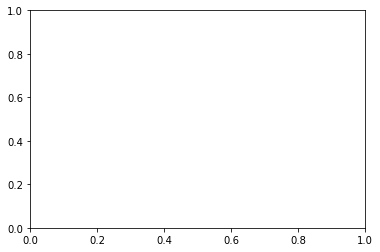

In [90]:
#plotting scatter plot w/ linear regression "Population vs House Price 2018-2019"
fig, ax=plt.subplots(1)
x_values = combined_df["2018-2019 Population rate"]
y_values = combined_df["2018-2019 House Price rate"]

plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values, color='pink')

plt.title("Population Changing rate vs House Price Changing rate from 2018 to 2019")
plt.xlabel("Population Changing Rate")
plt.ylabel("House Price rate")
plt.annotate(line_eq,(5,40), fontsize=15,color="pink")
plt.grid()
plt.show()


NameError: name 'combined_df' is not defined

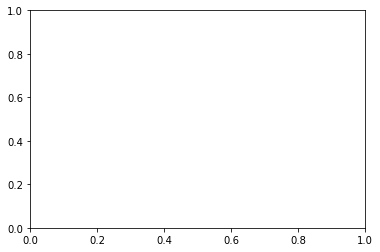

In [91]:
#plotting scatter plot w/ linear regression "Population vs House Price 2019-2020"
fig, ax=plt.subplots(1)
x_values = combined_df["2019-2020 Population rate"]
y_values = combined_df["2019-2020 House Price rate"]

plt.scatter(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values, color='pink')


plt.title("Population Changing rate vs House Price Changing rate from 2019 to 2020")
plt.xlabel("Population Changing Rate")
plt.ylabel("House Price rate")
plt.annotate(line_eq,(5,40), fontsize=15,color="pink")
plt.grid()
plt.show()


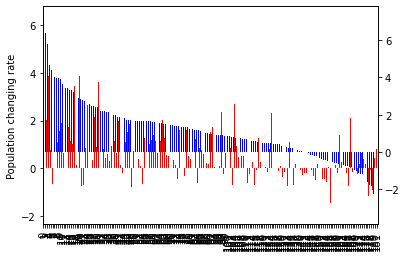

In [83]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

population_df["2018-2019 Population Rate"].plot(kind='bar', color='red', ax=ax, width=width, position=1)
population_df["2019-2020 Population Rate"].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Population changing rate')



In [76]:
population_df.head()

,Unnamed: 0,City,State,2018 Population,2019 Population,2020 Population,2018-2019 Population Rate,2019-2020 Population Rate
0,153,Frisco,TX,188452,200490,215060,6.387834,7.267195
1,168,Salt Lake City,UT,200435,200567,213367,0.065857,6.381907
2,27,Irvine,CA,281732,287401,303956,2.012196,5.760244
3,162,McKinney,TX,191748,199177,208487,3.874356,4.674234
4,175,Bellevue,WA,147064,148164,154647,0.747974,4.375557
